In [152]:
import matplotlib.pyplot as plt

In [153]:
import pandas as pd

In [154]:
df_bookings=pd.read_csv("datasets/fact_bookings.csv")
df_bookings.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640


In [155]:
df_bookings.shape

(134590, 12)

In [156]:
df_bookings.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [157]:
df_bookings.room_category.value_counts()

room_category
RT2    49505
RT1    38446
RT3    30566
RT4    16073
Name: count, dtype: int64

In [158]:
df_bookings.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [159]:
df_bookings.booking_platform.value_counts()

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

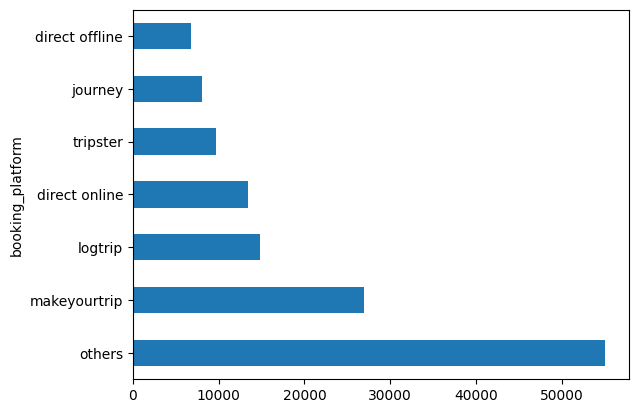

In [160]:
booking_fig = df_bookings.booking_platform.value_counts().plot(kind="barh")

In [161]:
df_agg_bookings=pd.read_csv("datasets/fact_aggregated_bookings.csv")
df_dates=pd.read_csv("datasets/dim_date.csv")
df_hotels=pd.read_csv("datasets/dim_hotels.csv")
df_rooms=pd.read_csv("datasets/dim_rooms.csv")



df_dates.head(4)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday


In [162]:
df_hotels.head(4)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi


In [163]:
df_bookings.shape

(134590, 12)

In [164]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [165]:
df_bookings = df_bookings[df_bookings.no_guests>0]
df_bookings.shape

(134578, 12)

In [166]:
df_bookings.revenue_generated.min(),df_bookings.revenue_generated.max()

(np.int64(6500), np.int64(28560000))

In [167]:
df_bookings.revenue_generated.mean()

np.float64(15378.036937686695)

In [168]:
avg,std = df_bookings.revenue_generated.mean(),df_bookings.revenue_generated.std()

In [169]:
avg,std

(np.float64(15378.036937686695), np.float64(93040.1549314641))

In [170]:
higher_limit = avg + 3*std
higher_limit

np.float64(294498.50173207896)

In [171]:
lower_limit = avg - 3*std
lower_limit

np.float64(-263742.4278567056)

In [172]:
df_bookings = df_bookings[df_bookings.revenue_generated<higher_limit]
df_bookings

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100
...,...,...,...,...,...,...,...,...,...,...,...,...
134584,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [173]:
df_bookings.revenue_realized.describe()

count    134573.000000
mean      12695.983585
std        6927.791692
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64

In [174]:
higher_limit = df_bookings.revenue_realized.mean()+3*df_bookings.revenue_realized.std()
higher_limit

np.float64(33479.358661845814)

In [175]:
df_dim_rooms

NameError: name 'df_dim_rooms' is not defined

In [176]:
df_bookings[df_bookings.room_category=='RT4'].revenue_realized.describe()

count    16071.000000
mean     23439.308444
std       9048.599076
min       7600.000000
25%      19000.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

In [177]:
23439 + 3 * 9048

50583

In [178]:
 df_bookings.isnull().sum()
# there may be no rating given by the customer that's why there is so much  NA values are showing in ratings_given

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

In [179]:
df_agg_bookings.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0


In [180]:
df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [181]:
df_agg_bookings.capacity.isnull().count()

np.int64(9200)

In [182]:
df_agg_bookings.capacity.describe()

count    9198.000000
mean       25.280496
std        11.442080
min         3.000000
25%        18.000000
50%        25.000000
75%        34.000000
max        50.000000
Name: capacity, dtype: float64

In [183]:
df_agg_bookings[df_agg_bookings.capacity.isna()]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,NaN
14,17562,1-May-22,RT1,12,NaN


In [184]:
df_agg_bookings.capacity.fillna(df_agg_bookings.capacity.median(),inplace=True)

C:\Users\nirma\AppData\Local\Temp\ipykernel_15704\2127972865.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_agg_bookings.capacity.fillna(df_agg_bookings.capacity.median(),inplace=True)


In [185]:
df_agg_bookings.loc[[8,14]]


,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,25.0
14,17562,1-May-22,RT1,12,25.0


In [186]:
df_agg_bookings.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0


In [187]:
df_agg_bookings["occ_pct"] = df_agg_bookings['successful_bookings']/df_agg_bookings['capacity']


In [188]:
df_agg_bookings.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,0.833333
1,19562,1-May-22,RT1,28,30.0,0.933333
2,19563,1-May-22,RT1,23,30.0,0.766667
3,17558,1-May-22,RT1,30,19.0,1.578947


In [189]:
df_agg_bookings['occ_pct'] = df_agg_bookings['occ_pct'].apply(lambda x : round(x*100,2)) 

In [190]:
df_agg_bookings.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
3,17558,1-May-22,RT1,30,19.0,157.89


In [191]:
df_agg_bookings.groupby("room_category")['occ_pct'].mean().round(2)

room_category
RT1    58.23
RT2    58.04
RT3    58.03
RT4    59.30
Name: occ_pct, dtype: float64

In [192]:
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [193]:
df = pd.merge(df_agg_bookings,df_rooms, left_on='room_category',right_on = 'room_id')
df.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,RT1,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,RT1,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,RT1,Standard
3,17558,1-May-22,RT1,30,19.0,157.89,RT1,Standard


In [194]:
df.groupby("room_class")["occ_pct"].mean().round(2)

room_class
Elite           58.04
Premium         58.03
Presidential    59.30
Standard        58.23
Name: occ_pct, dtype: float64

In [195]:
df.drop("room_id",axis=1,inplace=True)

In [196]:
df.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,Standard
3,17558,1-May-22,RT1,30,19.0,157.89,Standard


2. Print average occupancy rate per city

In [197]:
df = pd.merge(df_hotels,df, on = 'property_id')
df.head(4)

,property_id,property_name,category,city,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16558,Atliq Grands,Luxury,Delhi,1-May-22,RT1,18,19.0,94.74,Standard
1,16558,Atliq Grands,Luxury,Delhi,1-May-22,RT2,21,22.0,95.45,Elite
2,16558,Atliq Grands,Luxury,Delhi,1-May-22,RT3,8,8.0,100.00,Premium
3,16558,Atliq Grands,Luxury,Delhi,1-May-22,RT4,3,3.0,100.00,Presidential


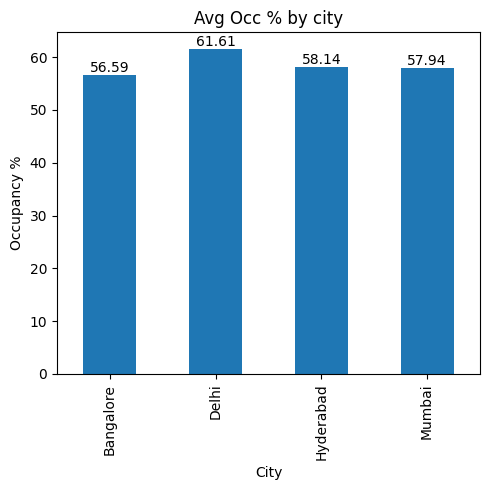

In [198]:
occ_by_city = df.groupby("city")["occ_pct"].mean().round(2)


ax = occ_by_city.plot(kind='bar', figsize=(5,5))

plt.title("Avg Occ % by city")
plt.ylabel("Occupancy %")
plt.xlabel("City")

for p in ax.patches:
    ax.text(
        p.get_x() +p.get_width()/2,
         p.get_height(),
        f'{p.get_height():.2f}',
        ha ='center',va='bottom',fontsize =10, color = "black"
    )


plt.tight_layout()
plt.show()




In [199]:
df = pd.merge(df,df_dates, left_on = 'check_in_date', right_on ='date')
df.head(4)

,property_id,property_name,category,city,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,date,mmm yy,week no,day_type
0,16558,Atliq Grands,Luxury,Delhi,10-May-22,RT1,10,19.0,52.63,Standard,10-May-22,May 22,W 20,weekeday
1,16558,Atliq Grands,Luxury,Delhi,10-May-22,RT2,12,22.0,54.55,Elite,10-May-22,May 22,W 20,weekeday
2,16558,Atliq Grands,Luxury,Delhi,10-May-22,RT3,4,8.0,50.00,Premium,10-May-22,May 22,W 20,weekeday
3,16558,Atliq Grands,Luxury,Delhi,10-May-22,RT4,2,3.0,66.67,Presidential,10-May-22,May 22,W 20,weekeday


In [200]:
occ_by_datatype = df.groupby('day_type')['occ_pct'].mean().round(2)

In [201]:
df.groupby('day_type')['occ_pct'].mean().round(2)

day_type
weekeday    50.90
weekend     72.39
Name: occ_pct, dtype: float64

In [202]:
df['mmm yy'].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [203]:
df_june_22 = df[df['mmm yy']== 'Jun 22']

In [204]:
df_june_22.head(3)

,property_id,property_name,category,city,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,date,mmm yy,week no,day_type
88,16558,Atliq Grands,Luxury,Delhi,10-Jun-22,RT1,11,19.0,57.89,Standard,10-Jun-22,Jun 22,W 24,weekeday
89,16558,Atliq Grands,Luxury,Delhi,10-Jun-22,RT2,16,22.0,72.73,Elite,10-Jun-22,Jun 22,W 24,weekeday
90,16558,Atliq Grands,Luxury,Delhi,10-Jun-22,RT3,6,8.0,75.00,Premium,10-Jun-22,Jun 22,W 24,weekeday


In [205]:
df_june_22.groupby("city")["occ_pct"].mean().round(2).sort_values(ascending=False)

city
Delhi        62.47
Hyderabad    58.46
Mumbai       58.38
Bangalore    56.58
Name: occ_pct, dtype: float64

In [206]:
df_august = pd.read_csv("datasets/new_data_august.csv")
df_august.head(4)

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67
3,19558,Atliq Grands,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,40,75.00


In [207]:
df_august.columns

Index(['property_id', 'property_name', 'category', 'city', 'room_category',
       'room_class', 'check_in_date', 'mmm yy', 'week no', 'day_type',
       'successful_bookings', 'capacity', 'occ%'],
      dtype='object')

In [208]:
df.columns

Index(['property_id', 'property_name', 'category', 'city', 'check_in_date',
       'room_category', 'successful_bookings', 'capacity', 'occ_pct',
       'room_class', 'date', 'mmm yy', 'week no', 'day_type'],
      dtype='object')

In [209]:
df_august.shape

(7, 13)

In [210]:
df.shape

(6500, 14)

In [211]:
latest_df = pd.concat([df,df_august],ignore_index=True, axis =0)
latest_df.tail(10)

,property_id,property_name,category,city,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,date,mmm yy,week no,day_type,occ%
6497,17564,Atliq Seasons,Business,Mumbai,31-Jul-22,RT2,19,40.0,47.50,Elite,31-Jul-22,Jul 22,W 32,weekend,NaN
6498,17564,Atliq Seasons,Business,Mumbai,31-Jul-22,RT3,11,24.0,45.83,Premium,31-Jul-22,Jul 22,W 32,weekend,NaN
6499,17564,Atliq Seasons,Business,Mumbai,31-Jul-22,RT4,10,17.0,58.82,Presidential,31-Jul-22,Jul 22,W 32,weekend,NaN
6500,16559,Atliq Exotica,Luxury,Mumbai,01-Aug-22,RT1,30,30.0,NaN,Standard,NaN,Aug-22,W 32,weekeday,100.00
6501,19562,Atliq Bay,Luxury,Bangalore,01-Aug-22,RT1,21,30.0,NaN,Standard,NaN,Aug-22,W 32,weekeday,70.00
6502,19563,Atliq Palace,Business,Bangalore,01-Aug-22,RT1,23,30.0,NaN,Standard,NaN,Aug-22,W 32,weekeday,76.67
6503,19558,Atliq Grands,Luxury,Bangalore,01-Aug-22,RT1,30,40.0,NaN,Standard,NaN,Aug-22,W 32,weekeday,75.00
6504,19560,Atliq City,Business,Bangalore,01-Aug-22,RT1,20,26.0,NaN,Standard,NaN,Aug-22,W 32,weekeday,76.92
6505,17561,Atliq Blu,Luxury,Mumbai,01-Aug-22,RT1,18,26.0,NaN,Standard,NaN,Aug-22,W 32,weekeday,69.23
6506,17564,Atliq Seasons,Business,Mumbai,01-Aug-22,RT1,10,16.0,NaN,Standard,NaN,Aug-22,W 32,weekeday,62.50


In [212]:
latest_df.shape

(6507, 15)

6. Print revenue relaized per city 

In [213]:
df_bookings.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640


In [214]:
df_hotels.head(4)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi


In [215]:
df_booking_all = pd.merge(df_bookings,df_hotels,on ='property_id')
df_booking_all.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi


In [216]:
df_booking_all.groupby('city')["revenue_generated"].sum().sort_values(ascending=False)

city
Mumbai       784786980
Bangalore    494814675
Hyderabad    381333250
Delhi        346350550
Name: revenue_generated, dtype: int64

In [217]:
df_bookings.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640


In [221]:
df_bookings["booking_status"].unique

<bound method Series.unique of 1           Cancelled
4         Checked Out
5         Checked Out
6           Cancelled
7             No Show
             ...     
134584    Checked Out
134585    Checked Out
134587      Cancelled
134588    Checked Out
134589      Cancelled
Name: booking_status, Length: 134573, dtype: object>

In [229]:
status_of_room = df_bookings["booking_status"].value_counts()

In [230]:
status_of_room

booking_status
Checked Out    94399
Cancelled      33416
No Show         6758
Name: count, dtype: int64

<Axes: ylabel='count'>

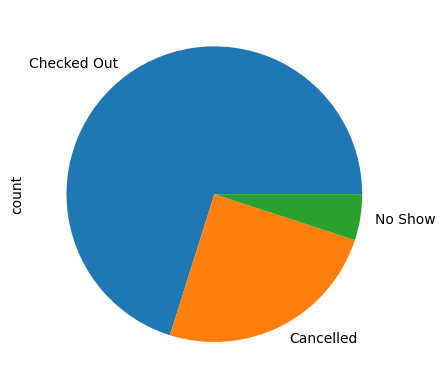

In [232]:
status_of_room.plot(kind='pie')

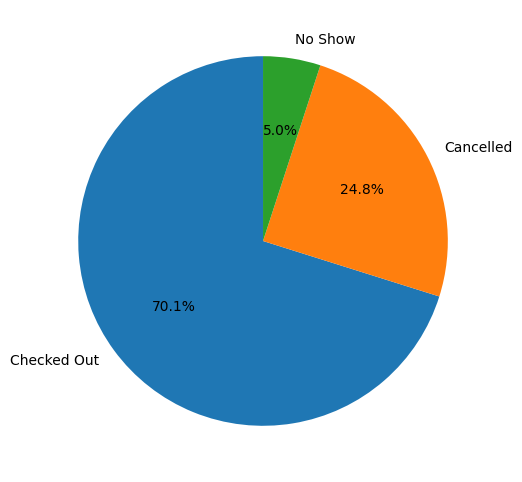

In [241]:
plt.figure(figsize=(6,6))
plt.pie(
    status_of_room,
    labels=status_of_room.index,
    autopct='%1.1f%%',
    startangle=90
)



plt.show()